In [97]:
import tensorflow as tf
import scipy.io as sio
import numpy as np

In [98]:
data1 =sio.loadmat('milldata/test_x_1.mat')['test_x'] 
data2 =sio.loadmat('milldata/test_x_2.mat')['test_x']

In [99]:
data = np.vstack((data1,data2))

In [100]:
data.shape

(1936, 512)

In [101]:
def weight_variable(shape, name):
    return tf.Variable(tf.truncated_normal(shape = shape, stddev = 0.1), name)
def bias_variable(shape, name):
    return tf.Variable(tf.constant(0.1, shape = shape), name)

In [102]:
x = tf.placeholder(tf.float32, shape = [None, 512])
e_W_1 = weight_variable([512, 256], "e_W_1")
e_b_1 = bias_variable([256], "e_b_1")
e_layer1 = tf.nn.relu(tf.matmul(x, e_W_1) + e_b_1)
e_W_2 = weight_variable([256, 128], "e_W_2")
e_b_2 = bias_variable([128], "e_b_2")
e_layer2 = tf.nn.relu(tf.matmul(e_layer1, e_W_2) + e_b_2)
e_W_3 = weight_variable([128, 64], "e_W_3")
e_b_3 = bias_variable([64], "e_b_3")
code_layer = tf.nn.relu(tf.matmul(e_layer2, e_W_3) + e_b_3)
d_W_1 = weight_variable([64, 128], "d_W_1")
d_b_1 = bias_variable([128], "d_b_1")
d_layer1 = tf.nn.relu(tf.matmul(code_layer, d_W_1) + d_b_1)
d_W_2 = weight_variable([128, 256], "d_W_2")
d_b_2 = bias_variable([256], "d_b_2")
d_layer2 = tf.nn.relu(tf.matmul(d_layer1, d_W_2) + d_b_2)
d_W_3 = weight_variable([256, 512], "d_W_3")
d_b_3 = bias_variable([512], "d_b_3")
output_layer = tf.nn.relu(tf.matmul(d_layer2, d_W_3) + d_b_3)

In [103]:
loss = tf.reduce_mean(tf.pow(output_layer - x, 2)*1000)
optimizer = tf.train.RMSPropOptimizer(0.001).minimize(loss)
init_op = tf.global_variables_initializer()

In [104]:
sess = tf.InteractiveSession()
sess.run(init_op)
for i in range(500):
    for indx in range(data.shape[0]/4):
        batch = data[indx*4:indx*4+3,:]
        #batch = data.next_batch(40)
        optimizer.run(feed_dict={x: batch})
    if i%10 == 0:
            print("step %d, loss %g"%(i, loss.eval(feed_dict={x:batch})))
print("final loss %g" % loss.eval(feed_dict={x: data}))

step 0, loss 0.25105
step 10, loss 0.0270997
step 20, loss 0.0246144
step 30, loss 0.0207329
step 40, loss 0.0195647
step 50, loss 0.0231199
step 60, loss 0.0192753
step 70, loss 0.0175891
step 80, loss 0.0242978
step 90, loss 0.0230828
step 100, loss 0.0198311
step 110, loss 0.0160168
step 120, loss 0.0164646
step 130, loss 0.017302
step 140, loss 0.0150389
step 150, loss 0.0198978
step 160, loss 0.0162528
step 170, loss 0.0167867
step 180, loss 0.0163427
step 190, loss 0.0184942
step 200, loss 0.0150036
step 210, loss 0.0164029
step 220, loss 0.0177786
step 230, loss 0.0153945
step 240, loss 0.0127586
step 250, loss 0.0182003
step 260, loss 0.0165871
step 270, loss 0.017037
step 280, loss 0.0156392
step 290, loss 0.0155278
step 300, loss 0.0158504
step 310, loss 0.0154273
step 320, loss 0.0137194
step 330, loss 0.0192015
step 340, loss 0.0130306
step 350, loss 0.0157203
step 360, loss 0.0210212
step 370, loss 0.010899
step 380, loss 0.0129543
step 390, loss 0.0148952
step 400, loss 0

In [22]:
484*4


1936

In [82]:
e_W_1_ = e_W_1.eval(sess)
e_b_1_ = e_b_1.eval(sess)
e_W_2_ = e_W_2.eval(sess)
e_b_2_ = e_b_2.eval(sess)
e_W_3_ = e_W_3.eval(sess)
e_b_3_ = e_b_3.eval(sess)

d_W_1_ = d_W_1.eval(sess)
d_b_1_ = d_b_1.eval(sess)
d_W_2_ = d_W_2.eval(sess)
d_b_2_ = d_b_2.eval(sess)
d_W_3_ = d_W_3.eval(sess)
d_b_3_ = d_b_3.eval(sess)

In [83]:
sio.savemat('milldata/wb3.mat' ,{'e_W_1_':e_W_1_,'e_b_1_':e_b_1_,'e_W_2_':e_W_2_,'e_b_2_':e_b_2_,'e_W_3_':e_W_3_,'e_b_3_':e_b_3_,'d_W_1_':d_W_1_,'d_b_1_':d_b_1_,'d_W_2_':d_W_2_,'d_b_2_':d_b_2_,'d_W_3_':d_W_3_,'d_b_3_':d_b_3_})

In [33]:
data = sio.loadmat('milldata/wb.mat')

In [84]:
data.shape


(1936, 512)

In [91]:
output_nd = output_layer.eval(feed_dict = {x:data[1030,:].reshape(1,-1) })

(1, 512)


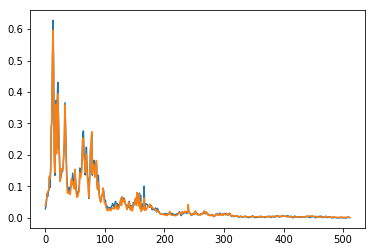

In [92]:
print output_nd.shape
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(output_nd[0,:])
plt.plot(data[1030,:])
plt.show()
encodedata = code_layer.eval(feed_dict = {x:data})

In [72]:
encodedata.shape

(1936, 64)

In [93]:
sio.savemat('milldata/encodeData3.mat' ,{"data":encodedata})

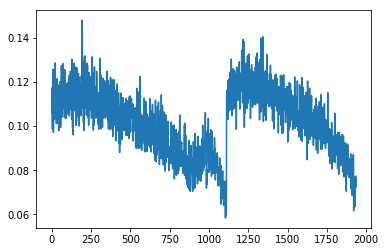

In [96]:
plt.plot(data[:,5])